In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D,Conv3D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from glob import glob

In [6]:
IMAGE_SIZE = [224, 224] 

# training config:
epochs = 100
batch_size = 32

In [19]:
covid_ct='S:/New folder/New folder/archive (1)/COVID'
non_covid_ct='S:/New folder/New folder/archive (1)/non-COVID'
covid_files = glob(covid_ct + '/*')
non_covid_ct_files = glob(non_covid_ct + '/*')

In [20]:
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 NonCovid Files: ",non_covid_ct_files[0:5])
print("Total Count: ",len(non_covid_ct_files))

First 5 Covid Files:  ['S:/New folder/New folder/archive (1)/COVID\\Covid (1).png', 'S:/New folder/New folder/archive (1)/COVID\\Covid (10).png', 'S:/New folder/New folder/archive (1)/COVID\\Covid (100).png', 'S:/New folder/New folder/archive (1)/COVID\\Covid (1000).png', 'S:/New folder/New folder/archive (1)/COVID\\Covid (1001).png']
Total Count:  1252
First 5 NonCovid Files:  ['S:/New folder/New folder/archive (1)/non-COVID\\Non-Covid (1).png', 'S:/New folder/New folder/archive (1)/non-COVID\\Non-Covid (10).png', 'S:/New folder/New folder/archive (1)/non-COVID\\Non-Covid (100).png', 'S:/New folder/New folder/archive (1)/non-COVID\\Non-Covid (1000).png', 'S:/New folder/New folder/archive (1)/non-COVID\\Non-Covid (1001).png']
Total Count:  1229


In [21]:
covid_ct_labels = []
non_covid_ct_labels = []
covid_ct_images=[]
non_covid_ct_images=[]

In [22]:
for i in range(len(covid_files)):
  import cv2 
  image = cv2.imread(covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  covid_ct_images.append(image)
  covid_ct_labels.append('COVID_CT')

ModuleNotFoundError: No module named 'cv2'

In [14]:
for i in range(len(non_covid_ct_files)):
  image = cv2.imread(non_covid_ct_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  non_covid_ct_images.append(image)
  non_covid_ct_labels.append('NonCOVID_CT')

In [15]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))
    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()
    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1,0.9])
    plt.show()    

<Figure size 640x480 with 0 Axes>

IndexError: list index out of range

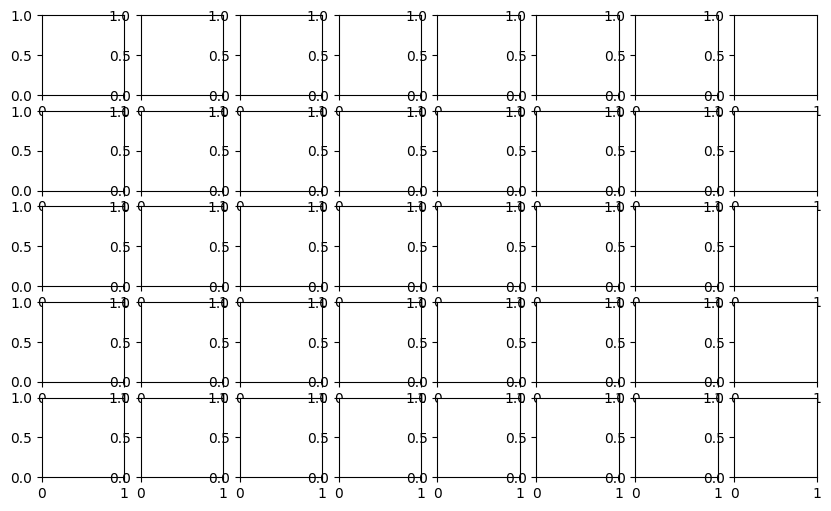

In [16]:
plt.tight_layout(pad=0.2, rect=[0, 0, 1,0.9])
plt.show()
plot_images(covid_ct_images, 'Positive COVID-19 CT Scan')
plot_images(non_covid_ct_images, 'Negative COVID-19 CT Scan')

In [17]:
covid_ct_images = np.array(covid_ct_images) / 255
non_covid_ct_images = np.array(non_covid_ct_images) / 255
covid_ct_labels = np.array([1 for _ in range(len(covid_ct_images))])
non_covid_ct_labels = np.array([0 for _ in range(len(non_covid_ct_images))])
from sklearn.model_selection import train_test_split
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(covid_ct_images, covid_ct_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(non_covid_ct_images, non_covid_ct_labels, test_size=0.2)
X_train = np.concatenate((noncovid_x_train[:80], covid_x_train[:80]), axis=0)
X_test = np.concatenate((noncovid_x_test[80:], covid_x_test[80:]), axis=0)
y_train = np.concatenate((noncovid_y_train[:80], covid_y_train[:80]), axis=0)
y_test = np.concatenate((noncovid_y_test[80:], covid_y_test[80:]), axis=0)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print("Number of samples in train and test are %d and %d.",(X_train.shape[0],X_test.shape[0]))

In [ ]:
plot_images(covid_x_train, 'X_train')
plot_images(covid_x_test, 'X_test')

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_aug = ImageDataGenerator(rescale=1. /255)

In [ ]:
model = tf.keras.models.Sequential([
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=0.001),metrics=["accuracy"])
from keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 
history = model.fit_generator(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // batch_size,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs)

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)
prediction=y_pred[1:10]
for index, probability in enumerate(prediction):
  if probability[0] > 0.5:
     plt.title('%.2f' % (probability[0]*100) + '% COVID_CT')
  else:
    plt.title('%.2f' % ((1-probability[0])*100) + '% NONCOVID_CT')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.show()